In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv('cleaned_online_retail_data.csv')

# Ensure 'InvoiceDate' is parsed as a datetime object
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [2]:
# Aggregate by Month
monthly_data = data.groupby(data['InvoiceDate'].dt.to_period('M')).agg({
    'Total Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Convert back to datetime for modeling
monthly_data['InvoiceDate'] = monthly_data['InvoiceDate'].dt.to_timestamp()

# Extract Month as a numeric feature
monthly_data['Month'] = monthly_data['InvoiceDate'].dt.month


In [3]:
# Features (e.g., Month, Quantity) and Target (Total Revenue)
X1 = monthly_data[['Month', 'Quantity']]
y1 = monthly_data['Total Revenue']

# Split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [4]:
# Initialize and train model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)

# Predictions
y_pred1 = model1.predict(X_test1)

# Evaluate model
mse = mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 17248540731.18439
Mean Absolute Error: 116801.20642800009


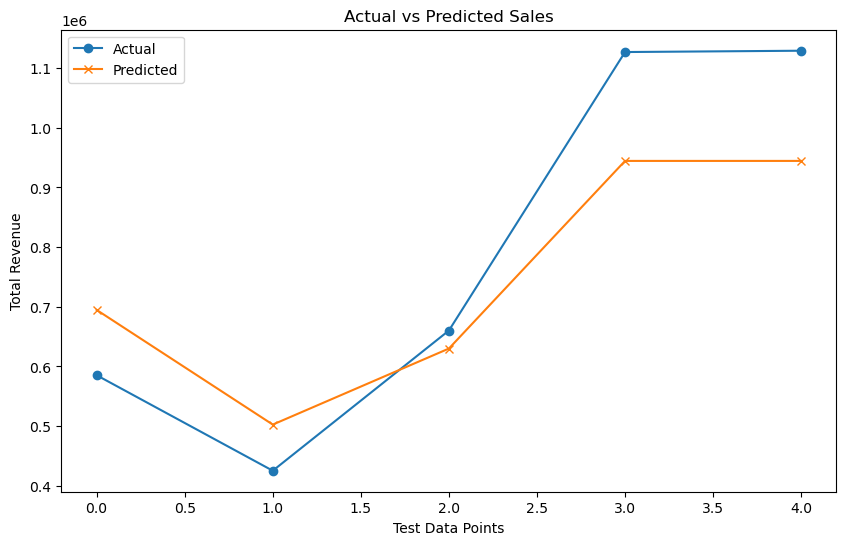

In [6]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test1.values, label='Actual', marker='o')
plt.plot(y_pred1, label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

In [7]:
print(data.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Day of Week', 'Time of Day',
       'Total Revenue'],
      dtype='object')


In [8]:
# Aggregate data by customer or transaction
aggregated_data = data.groupby(['Customer ID', data['InvoiceDate'].dt.to_period('M')]).agg({
    'Quantity': 'sum',  # Total goods in a cart
    'Total Revenue': 'sum',  # Total revenue
    'Invoice': 'count'  # Transaction count
}).reset_index()

# Rename columns for clarity
aggregated_data.rename(columns={
    'Quantity': 'Goods in Cart', # There'e no attribute for which goods are in a cart
    'Total Revenue': 'Revenue',
    'Invoice': 'Frequency of Purchases'
}, inplace=True)

# Calculate Average Transaction Size
aggregated_data['Average Transaction Size'] = aggregated_data['Revenue'] / aggregated_data['Frequency of Purchases']

# Convert 'InvoiceDate' back to datetime for modeling
aggregated_data['InvoiceDate'] = aggregated_data['InvoiceDate'].dt.to_timestamp()

# Drop rows with invalid values (if any)
aggregated_data.dropna(inplace=True)


In [9]:
# Features and target
X = aggregated_data[['Goods in Cart', 'Average Transaction Size', 'Frequency of Purchases']]
y = aggregated_data['Revenue']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 230895.09925589882
Mean Absolute Error: 54.837299827745866


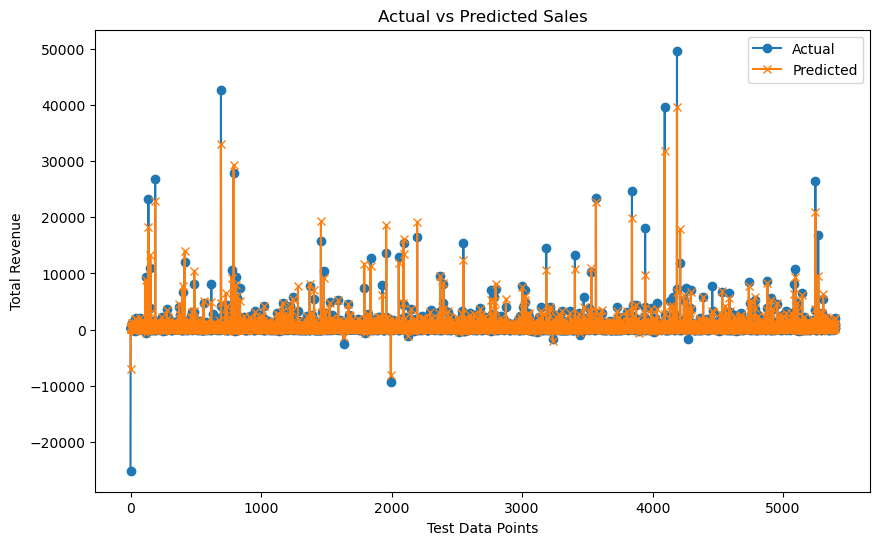

In [14]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

In [ ]:
VISUALIZE SALES TRENDS

In [18]:
# Group by Month to find low sales periods
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Total Revenue'].sum().reset_index()

# Convert 'InvoiceDate' back to datetime for visualization
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# Group by Hour to find off-peak times
data['Hour'] = data['InvoiceDate'].dt.hour
hourly_sales = data.groupby('Hour')['Total Revenue'].sum().reset_index()


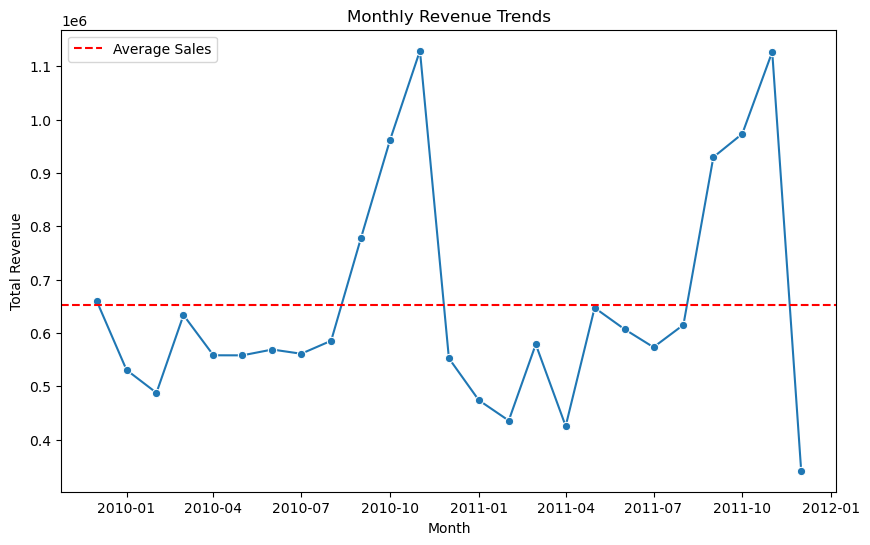

In [19]:
# Monthly sales plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='InvoiceDate', y='Total Revenue', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.axhline(monthly_sales['Total Revenue'].mean(), color='red', linestyle='--', label='Average Sales')
plt.legend()
plt.show()

C:\Users\ferhe\AppData\Local\Temp\ipykernel_11148\913200575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='Hour', y='Total Revenue', palette='coolwarm')


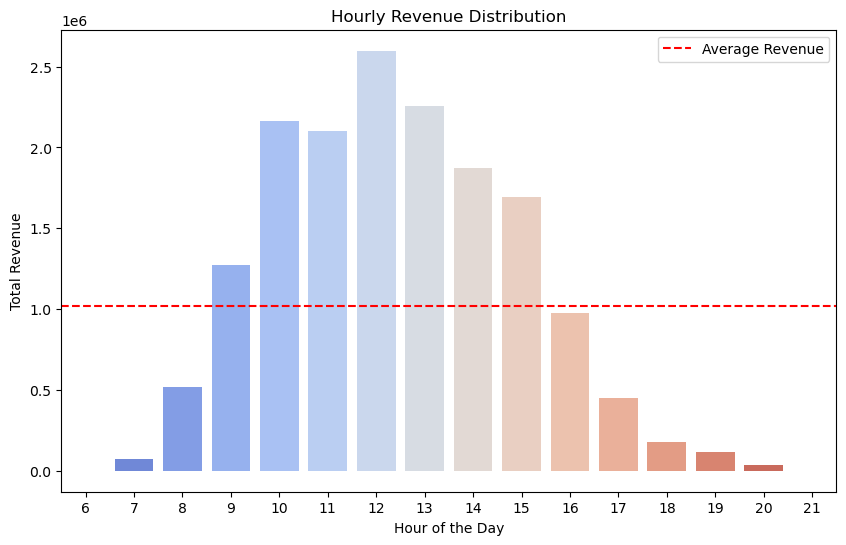

In [20]:
# Hourly sales plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_sales, x='Hour', y='Total Revenue', palette='coolwarm')
plt.title('Hourly Revenue Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.axhline(hourly_sales['Total Revenue'].mean(), color='red', linestyle='--', label='Average Revenue')
plt.legend()
plt.show()

In [21]:
# Find months with sales below average
low_sales_months = monthly_sales[monthly_sales['Total Revenue'] < monthly_sales['Total Revenue'].mean()]
print("Low Sales Months:")
print(low_sales_months)

# Find hours with sales below average
low_sales_hours = hourly_sales[hourly_sales['Total Revenue'] < hourly_sales['Total Revenue'].mean()]
print("Off-Peak Hours:")
print(low_sales_hours)

Low Sales Months:
   InvoiceDate  Total Revenue
1   2010-01-01     530436.512
2   2010-02-01     487596.426
3   2010-03-01     633419.311
4   2010-04-01     558007.832
5   2010-05-01     557873.390
6   2010-06-01     568784.550
7   2010-07-01     560885.330
8   2010-08-01     585259.460
12  2010-12-01     552372.860
13  2011-01-01     473731.900
14  2011-02-01     435534.070
15  2011-03-01     578576.210
16  2011-04-01     425222.671
17  2011-05-01     647011.670
18  2011-06-01     606862.520
19  2011-07-01     573112.321
20  2011-08-01     615078.090
24  2011-12-01     341557.430
Off-Peak Hours:
    Hour  Total Revenue
0      6       -497.350
1      7      73535.220
2      8     516364.770
10    16     976944.311
11    17     447127.342
12    18     174186.220
13    19     116697.670
14    20      34976.790
15    21         -4.950
